# Data Analysis Internship

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [214]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [215]:
dataset = pd.read_csv("/Users/mrityunjay/Desktop/My-Internship/Cognifyz/Data-Analysis/Dataset .csv")
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [216]:
dataset.shape

(9551, 21)

In [217]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [218]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [219]:
dataset['Cuisines'].fillna(dataset['Cuisines'].mode()[0], inplace = True)
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [220]:
categorical_column = dataset.select_dtypes(include=['object']).columns
numerical_column = dataset.select_dtypes(exclude=['object']).columns
print(categorical_column)
print(numerical_column)

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')
Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


## Level 3

### Task 1 : Restaurant Reviews

#### Analyze the text reviews to identify the most common positive and negative keywords.

In [224]:
rating_texts = dataset["Rating text"].value_counts()
rating_texts

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

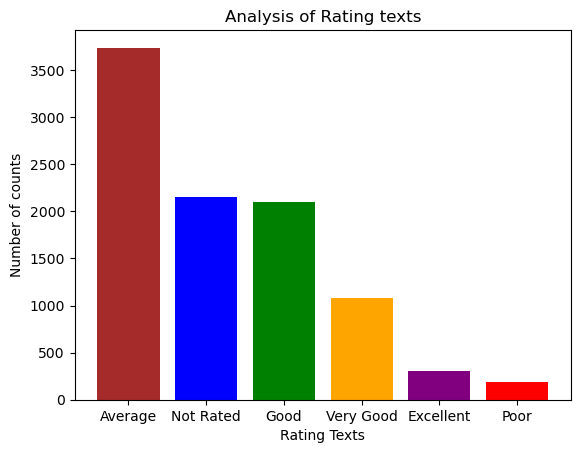

In [225]:
plt.bar(["Average", "Not Rated", "Good", "Very Good", "Excellent", "Poor"],
        list(rating_texts.values),
        color = ["brown", "blue", "green", "orange", "purple", "red"])
plt.title("Analysis of Rating texts")
plt.xlabel("Rating Texts")
plt.ylabel("Number of counts")
plt.show()

In [226]:
rating_text_dict = dict(zip(rating_texts.index, rating_texts))
rating_text_dict

{'Average': 3737,
 'Not rated': 2148,
 'Good': 2100,
 'Very Good': 1079,
 'Excellent': 301,
 'Poor': 186}

In [227]:
rating_text_df = pd.DataFrame(rating_text_dict.items(), columns = ["Rating text", "Counts"])
rating_text_df

,Rating text,Counts
0,Average,3737
1,Not rated,2148
2,Good,2100
3,Very Good,1079
4,Excellent,301
5,Poor,186


In [228]:
positive_keywords = rating_text_df.loc[[2,3,4]]
negative_keywords = rating_text_df.loc[[0,1,5]]

In [229]:
print("Number of most common positive keywords are : \n")
positive_keywords

Number of most common positive keywords are : 



,Rating text,Counts
2,Good,2100
3,Very Good,1079
4,Excellent,301


In [230]:
print("Number of most common negative keywords are : \n")
negative_keywords

Number of most common negative keywords are : 



,Rating text,Counts
0,Average,3737
1,Not rated,2148
5,Poor,186


#### Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [232]:
analyze_df = dataset[['Rating text','Aggregate rating']].copy()
analyze_df['Review Length'] = analyze_df['Rating text'].apply(lambda x: len(str(x)))

In [233]:
avg_review_len = analyze_df.groupby('Aggregate rating')['Review Length'].mean()
ave_review_len.head(10)

Aggregate rating
0.0    9.0
1.8    4.0
1.9    4.0
2.0    4.0
2.1    4.0
2.2    4.0
2.3    4.0
2.4    4.0
2.5    7.0
2.6    7.0
Name: Review Length, dtype: float64

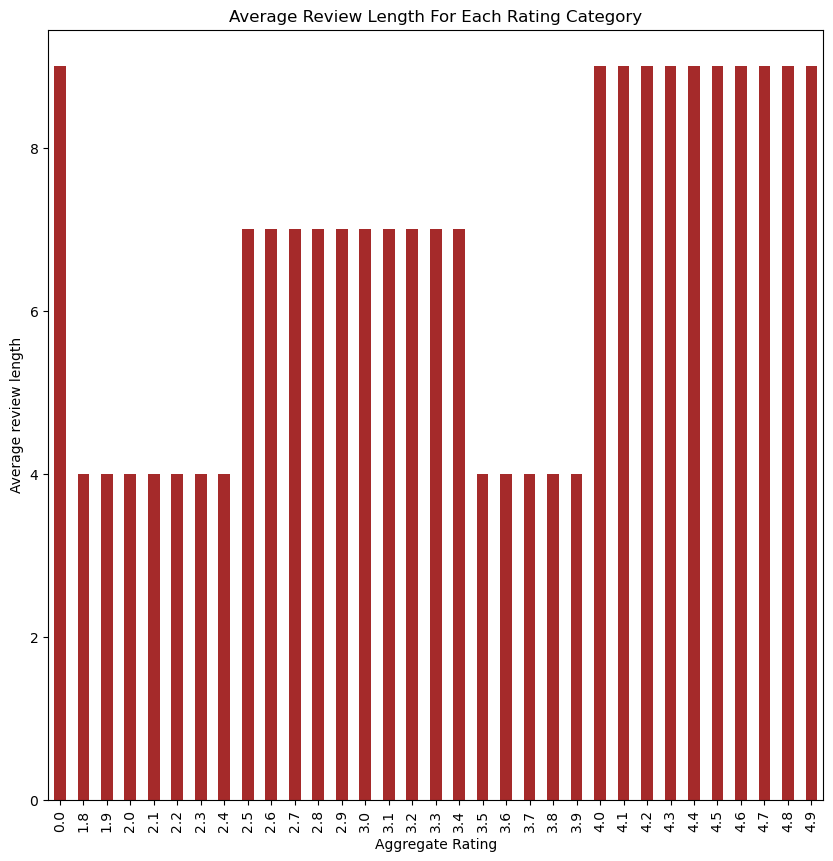

In [234]:
plt.figure(figsize = (10, 10))
ave_review_len.plot(kind = 'bar',color = 'brown')
plt.title('Average Review Length For Each Rating Category')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average review length')
plt.show()

### Task 2 : Votes Analysis

#### Identify the restaurants with the highest and lowest number of votes.

In [237]:
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [260]:
votes_df = dataset[["Restaurant Name", "Votes"]]
votes_df.head(10)

,Restaurant Name,Votes
0,Le Petit Souffle,314
1,Izakaya Kikufuji,591
2,Heat - Edsa Shangri-La,270
3,Ooma,365
4,Sambo Kojin,229
5,Din Tai Fung,336
6,Buffet 101,520
7,Vikings,677
8,Spiral - Sofitel Philippine Plaza Manila,621
9,Locavore,532


In [266]:
print("Restaurant Name with presence of Highest Votes : \n")
max_votes = votes_df.loc[votes_df["Votes"].idxmax()]
print(max_votes)

Restaurant Name with presence of Highest Votes : 

Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object


In [268]:
print("Restaurant Name with presence of Lowest Votes : \n")
min_votes = votes_df.loc[votes_df["Votes"].idxmin()]
print(min_votes)

Restaurant Name with presence of Lowest Votes : 

Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object


#### Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [275]:
corr_analyze = dataset[["Votes", "Aggregate rating"]].copy()
corr_analyze.head(10)

,Votes,Aggregate rating
0,314,4.8
1,591,4.5
2,270,4.4
3,365,4.9
4,229,4.8
5,336,4.4
6,520,4.0
7,677,4.2
8,621,4.9
9,532,4.8


In [277]:
corr = corr_analyze["Votes"].corr(corr_analyze["Aggregate rating"])
corr

0.31369058419541146

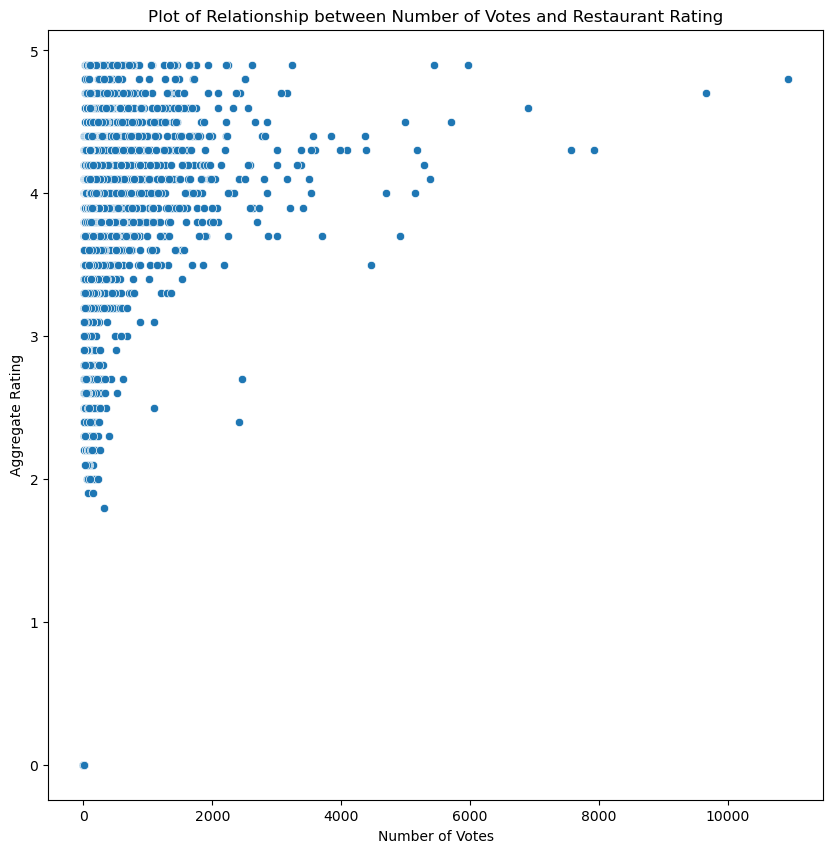

In [287]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'Votes', y = 'Aggregate rating', data = corr_analyze)
plt.title('Plot of Relationship between Number of Votes and Restaurant Rating')
plt.xlabel("Number of Votes")
plt.ylabel('Aggregate Rating')
plt.show()

### Task 3 : Price Range vs. Online Delivery and Table Booking

In [293]:
dataset.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


#### Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [324]:
data_analysis = dataset[["Price range", "Has Online delivery", "Has Table booking"]].copy()
data_analysis.head()

,Price range,Has Online delivery,Has Table booking
0,3,No,Yes
1,3,No,Yes
2,4,No,Yes
3,4,No,No
4,4,No,Yes


In [326]:
data_analysis["Has Online delivery"] = data_analysis["Has Online delivery"].map({"Yes" : True, "No" : False})
data_analysis["Has Table booking"] = data_analysis["Has Table booking"].map({"Yes" : True, "No" : False})

In [328]:
data_analysis.head()

,Price range,Has Online delivery,Has Table booking
0,3,False,True
1,3,False,True
2,4,False,True
3,4,False,False
4,4,False,True


In [330]:
relation_table = pd.pivot_table(data_analysis,
                               index = "Price range",
                               values = ["Has Online delivery", "Has Table booking"],
                               aggfunc = sum)

In [332]:
relation_table

,Has Online delivery,Has Table booking
Price range,,
1,701,1
2,1286,239
3,411,644
4,53,274


<Figure size 1000x1000 with 0 Axes>

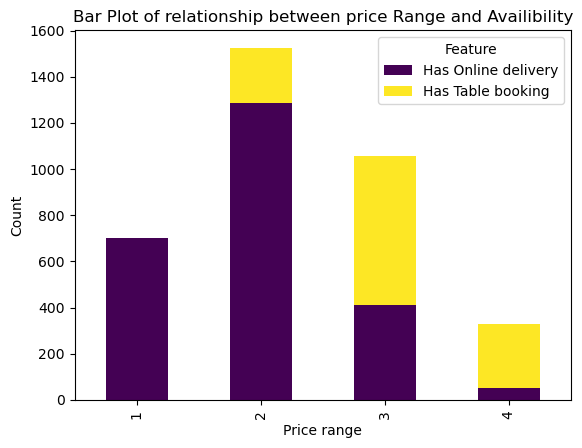

In [334]:
plt.figure(figsize=(10, 10))
relation_table.plot(kind = 'bar', stacked = True, colormap = 'viridis')
plt.title('Bar Plot of relationship between price Range and Availibility')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.legend(title = 'Feature', loc = 'upper right')
plt.show()

#### Determine if higher-priced restaurants are more likely to offer these services

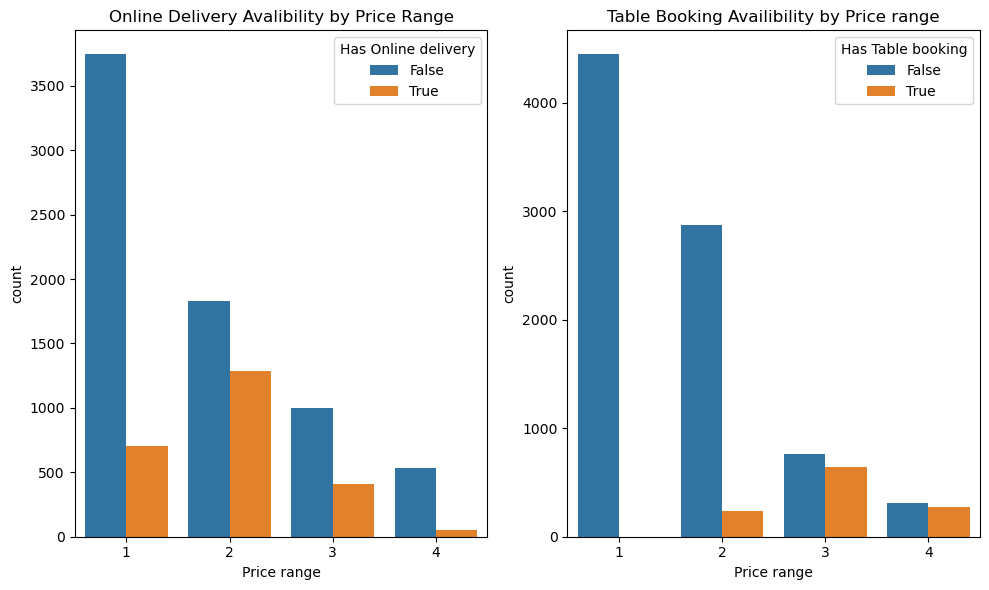

In [341]:
plt.figure(figsize=(10,6))

# 1st subplot
plt.subplot(1,2,1)
sns.countplot(x = 'Price range' , hue = 'Has Online delivery' , data = data_analysis)
plt.title('Online Delivery Avalibility by Price Range')

# 2nd subplot
plt.subplot(1,2,2)
sns.countplot(x = 'Price range', hue = 'Has Table booking', data = data_analysis)
plt.title('Table Booking Availibility by Price range')

plt.tight_layout()
plt.show()